In [19]:
import numpy as np
import random
from output_layer_generator import NeuralNetworkGenerator
from modules import run_complete_pipeline

In [ ]:
U, V, X, masks, prob_matrix = run_complete_pipeline(N=15, T=15, d=5, L_X=3, L_mask=3, num_masks=5)

In [20]:
from hierarchical_pipeline import run_hierarchical_generation

# Step 1: Generate data and masking matrices using the complete pipeline
U, V, X, masks, prob_matrix = run_complete_pipeline(N=15, T=15, d=5, L_X=3, L_mask=3, num_masks=5)
print(f"Generated data matrix X shape: {X.shape}")
print(f"Generated {len(masks)} masking matrices, each shape: {masks[0].shape}")
print(f"Probability matrix shape: {prob_matrix.shape}")

# Step 2: Use the pipeline output for hierarchical generation
# Example parameters for hierarchical generation
J, K = 3, 4  # Number of data and masking matrices to use
N, T = X.shape  # Size of each matrix (from run_complete_pipeline)
B = 5  # Number of pairs to sample
num_big_masks = 3  # Number of big mask matrices to generate

# Create JxK data matrices and masking matrices from the pipeline output
data_matrices = np.zeros((J, K, N, T))
masking_matrices = np.zeros((J, K, N, T))

# Fill data_matrices with X (data matrix from pipeline)
for j in range(J):
    for k in range(K):
        data_matrices[j, k] = X

# Fill masking_matrices with different masks from pipeline
for j in range(J):
    for k in range(K):
        mask_idx = (j * K + k) % len(masks)  # Cycle through available masks
        masking_matrices[j, k] = masks[mask_idx]

print(f"\nCreated data_matrices shape: {data_matrices.shape}")
print(f"Created masking_matrices shape: {masking_matrices.shape}")
print(f"Data matrices contain the same X matrix from pipeline")
print(f"Masking matrices contain {len(masks)} different binary masks from pipeline")

# Run hierarchical generation
big_data_matrix, big_mask_matrices, P_M, sampled_pairs = run_hierarchical_generation(
    data_matrices,
    masking_matrices,
    B=B,
    data_L=2,
    mask_L=2,
    num_big_masks=num_big_masks,
    data_seed=123,
    mask_seed=456,
    pair_seed=789
)

print("\n=== Hierarchical Generation Results ===")
print("Big data matrix shape:", big_data_matrix.shape)
print(f"Generated {len(big_mask_matrices)} big mask matrices, each shape: {big_mask_matrices[0].shape}")
print("Probability mask (P_M) shape:", P_M.shape)
print("Sampled pairs:", sampled_pairs)
print("P_M (rounded):\n", np.round(P_M, 3))
print(f"\nGenerated {num_big_masks} big mask matrices:")
for mask_idx, big_mask_matrix in enumerate(big_mask_matrices):
    print(f"\nMask {mask_idx + 1}:")
    print("Binary values (0s and 1s):", np.unique(big_mask_matrix))
    print("Block sums:")
    for j in range(J):
        for k in range(K):
            block_sum = big_mask_matrix[j*N:(j+1)*N, k*T:(k+1)*T].sum()
            print(f"  Block ({j},{k}) sum: {block_sum:.2f}")

Step 1: U shape (15, 5), V shape (15, 5)
Step 2: X shape (15, 15)
Step 3: Probability matrix shape (15, 15)
Generated 5 masking matrices, each shape: (15, 15)
Generated data matrix X shape: (15, 15)
Generated 5 masking matrices, each shape: (15, 15)
Probability matrix shape: (15, 15)

Created data_matrices shape: (3, 4, 15, 15)
Created masking_matrices shape: (3, 4, 15, 15)
Data matrices contain the same X matrix from pipeline
Masking matrices contain 5 different binary masks from pipeline

=== Hierarchical Generation Results ===
Big data matrix shape: (45, 60)
Generated 3 big mask matrices, each shape: (45, 60)
Probability mask (P_M) shape: (3, 4)
Sampled pairs: [(1, 3), (2, 2), (0, 0), (2, 3), (0, 2)]
P_M (rounded):
 [[0.396 0.605 0.34  0.496]
 [0.479 0.432 0.752 0.696]
 [0.484 0.568 0.334 0.52 ]]

Generated 3 big mask matrices:

Mask 1:
Binary values (0s and 1s): [0. 1.]
Block sums:
  Block (0,0) sum: 114.00
  Block (0,1) sum: 116.00
  Block (0,2) sum: 0.00
  Block (0,3) sum: 0.00
 

=== Heterogeneous Flow Matching Demo ===
This demo will take approximately 30 minutes to complete.

1. Generating heterogeneous training data...
Generating heterogeneous training data...
Target: 300 samples
Generated 0/300 samples...
Step 1: U shape (20, 3), V shape (15, 3)
Error generating sample 0: num_layers must be at least 1
Step 1: U shape (18, 3), V shape (12, 3)
Step 2: X shape (18, 12)
Step 3: Probability matrix shape (18, 12)
Generated 3 masking matrices, each shape: (18, 12)
Step 1: U shape (12, 6), V shape (18, 6)
Step 2: X shape (12, 18)
Step 3: Probability matrix shape (12, 18)
Generated 4 masking matrices, each shape: (12, 18)
Step 1: U shape (10, 6), V shape (10, 6)
Step 2: X shape (10, 10)
Step 3: Probability matrix shape (10, 10)
Generated 3 masking matrices, each shape: (10, 10)
Step 1: U shape (15, 7), V shape (20, 7)
Step 2: X shape (15, 20)
Step 3: Probability matrix shape (15, 20)
Generated 3 masking matrices, each shape: (15, 20)
Step 1: U shape (20, 8), V shape

/Users/kyuseongchoi/.pyenv/versions/3.10.4/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch   0: Loss = 0.353146, Best = 0.353146, LR = 1.00e-04, ETA = 2.4min
Epoch  10: Loss = 0.279335, Best = 0.279335, LR = 1.00e-04, ETA = 1.5min
Epoch  20: Loss = 0.262146, Best = 0.262146, LR = 1.00e-04, ETA = 1.4min
Epoch  30: Loss = 0.242867, Best = 0.242867, LR = 1.00e-04, ETA = 1.3min
Epoch  40: Loss = 0.224226, Best = 0.224226, LR = 1.00e-04, ETA = 1.3min
Epoch  50: Loss = 0.209263, Best = 0.209263, LR = 1.00e-04, ETA = 1.2min
Epoch  60: Loss = 0.191625, Best = 0.191625, LR = 1.00e-04, ETA = 1.2min
Epoch  70: Loss = 0.178095, Best = 0.178095, LR = 1.00e-04, ETA = 1.1min
Epoch  80: Loss = 0.165543, Best = 0.165543, LR = 1.00e-04, ETA = 1.1min
Epoch  90: Loss = 0.154123, Best = 0.154123, LR = 1.00e-04, ETA = 1.0min
Epoch 100: Loss = 0.142587, Best = 0.142587, LR = 1.00e-04, ETA = 1.0min
Epoch 110: Loss = 0.134914, Best = 0.134815, LR = 1.00e-04, ETA = 0.9min
Epoch 120: Loss = 0.126250, Best = 0.126250, LR = 1.00e-04, ETA = 0.9min
Epoch 130: Loss = 0.120358, Best = 0.120358, LR = 1

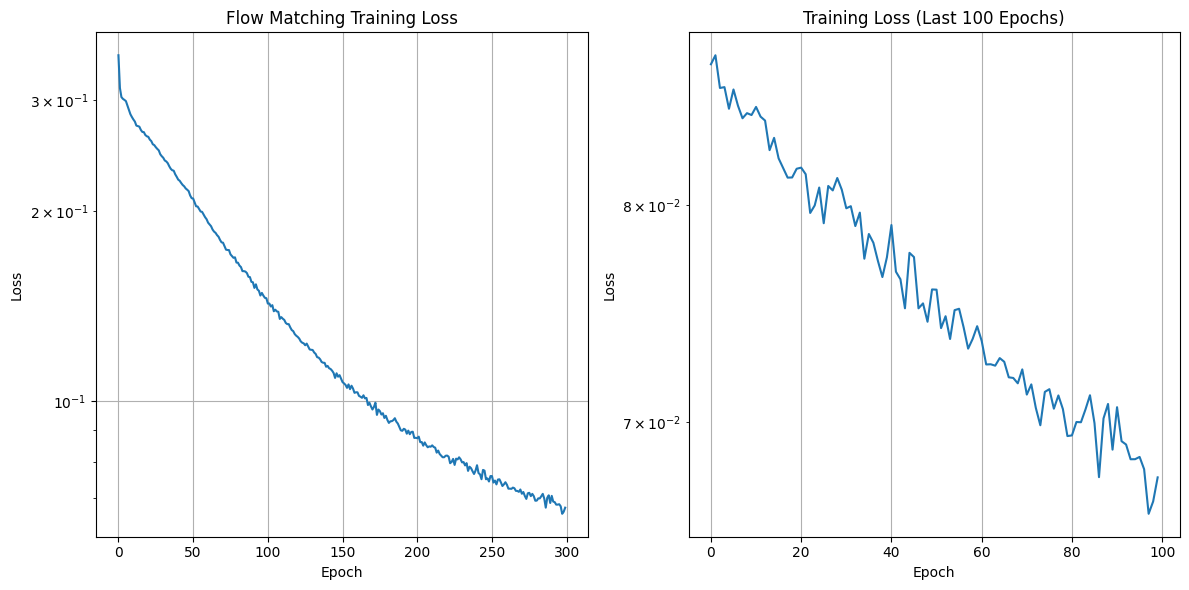


3. Testing model on various configurations...

=== Testing Model on Various Configurations ===

Test 1: {'N': 10, 'T': 10, 'd': 3, 'L_X': 1, 'L_mask': 2, 'num_masks': 3, 'J': 2, 'K': 3, 'B': 4}
Step 1: U shape (10, 3), V shape (10, 3)
Step 2: X shape (10, 10)
Step 3: Probability matrix shape (10, 10)
Generated 3 masking matrices, each shape: (10, 10)
  Error: mat1 and mat2 shapes cannot be multiplied (1x664 and 689x512)

Test 2: {'N': 15, 'T': 15, 'd': 5, 'L_X': 2, 'L_mask': 3, 'num_masks': 5, 'J': 3, 'K': 4, 'B': 5}
Step 1: U shape (15, 5), V shape (15, 5)
Step 2: X shape (15, 15)
Step 3: Probability matrix shape (15, 15)
Generated 5 masking matrices, each shape: (15, 15)
  Error: mat1 and mat2 shapes cannot be multiplied (1x2764 and 689x512)

Test 3: {'N': 20, 'T': 20, 'd': 7, 'L_X': 3, 'L_mask': 1, 'num_masks': 4, 'J': 4, 'K': 3, 'B': 6}
Step 1: U shape (20, 7), V shape (20, 7)
Step 2: X shape (20, 20)
Step 3: Probability matrix shape (20, 20)
Generated 4 masking matrices, each sha

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x664 and 689x512)

In [22]:
from flow_matching_heterogeneous_demo import heterogeneous_flow_matching_demo

# This will take ~30 minutes
model, data_matrices, masking_matrices = heterogeneous_flow_matching_demo()